<h1><center>Ανάλυση Συστημάτων Ηλεκτρικής Ενέργειας - Μόνιμη Κατάσταση Λειτουργίας</center></h1>

<h1><center> ΡΟΗ ΦΟΡΤΙΟΥ</center></h1>

<div>
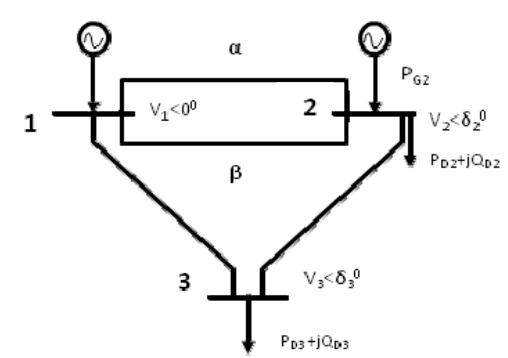
</div>

<h4><center> Σχήμα 1: Σύστημα τριών ζυγών</center></h4>
Για το σύστημα ηλεκτρικής ενέργειας με την τοπολογία του παραπάνω σχήματος δίνονται τα ακόλουθα δεδομένα:
* Ονομαστική τάση: 150kV
* Κοινή βάση ισχύος:100MVA
* Επαγωγικές αντιδράσεις και αγωγιμότητες των γραμμών μεταφοράς: 
    - $\boldsymbol{z}_{12_{(α)}}= {z}_{21_{(β)}}=j0.1$ α.μ.,
    - $\boldsymbol{z}_{13}=j15$ Ω, 
    - $\boldsymbol{z}_{23}=j0.25$ α.μ. (βάση ισχύος 250 MVA)
* Δεδομένα ζυγών: $V_1=V_2=1$ α.μ., $P_{G2}=200$ MW, $P_{D2}= 50$ MW, $Q_{D2}=50$ MVAr, $P_{D3}=300$ MW, $Q_{D3}= 100$ MVAr

### Βήμα 1ο: Εύρεση των ανά μονάδα τιμών του συστήματος

> #### Ισοδύναμες αντιστάσεις γραμμών 
Yπολογίζουμε τη βασική τιμή της αντίστασης: $$Ζ_{Β} = \frac{V_{B}^{2}}{S_B} \quad (1)$$
και στη συνέχεια, αν δεν δίνονται ήδη, υπολογίζουμε τις ανά μονάδα τιμές των αντιστάσεων: $$Ζ_{(αμ)} = \frac{Z(Ω)}{Ζ_{B}}\quad (2)$$
Προσοχη: αν η τιμή της αντίστασης είναι σε άλλη βασική τιμή ισχύος από αυτή που έχει οριστεί πρέπει να κάνουμε αναγωγή στη νέα, με τη σχέση: $$Ζ_{Ν_{(αμ)}} = Ζ_{Π_{(αμ)}}\cdot  (\frac{V_{B,Π}}{V_{B,N}})^{2}\cdot \frac{S_{B,N}}{S_{B,Π}} \quad (3) $$

 Στο παράδειγμα έχουμε:

In [1]:
Vbase = 150;
basemva = 100;
Sbold = 250;
j=sqrt(-1); 
Z13 = j*15;
Z23 = j*0.25;

Zbase = Vbase^2/basemva % (1)
Z13= Z13/Zbase %(2) 
Z23 = Z23*(basemva/Sbold) %(3)

Zbase =
   225
Z13 =
   0.0000 + 0.0667i
Z23 =
   0.0000 + 0.1000i


#### Δεδομένα εισόδου
Δεδομένα των γραμμών μεταφοράς και μετασχηματιστών:

In [2]:
%             Line code
%         Bus bus   R      X      1/2 B     = 1 for lines  
%         nl  nr   p.u.   p.u.    p.u.      > 1 or < 1 tr. tap at bus nl       
linedata=[1   2    0.0    0.05     0.0         1        
          1   3    0.0    0.0667   0.0         1        
          2   3    0.0    0.1      0.0         1];

Δεδομένα των ζυγών: 

In [3]:
%        Bus Bus  Voltage Angle   ---Load---- --Generator-- Injected 
%        No  code Mag.    Degree   MW   Mvar    MW  Mvar    Mvar
busdata=[1   1    1.00    0.0      0      0      0    0      0      
         2   2    1.00    0.0     50     50     200   0      0     
         3   0    1.00    0.0     300    100     0    0      0 ];

>#### Έγχυση πραγματικής και αέργου ισχύος  
> Γίνεται το ισοζύγιο ισχύος για κάθε ζυγό $k$ ξεχωριστά και υπολογίζονται οι ανά μονάδα τιμές της έγχυσης ενεργού και αέργου ισχύος από τις σχέσεις:
>$$P_{sp,k} = \frac{P_{G,k} -P_{D,k}}{S_{base}}\quad (4)$$
>$$Q_{sp,k} = \frac{Q_{G,k} -Q_{D,k}}{S_{base}}\quad (5) $$
Οι μιγαδικές ισχείς εκφράζονται ως:
>$$S = P_{sp,k} + jQ_{sp,k}\quad (6)$$

In [4]:
Vm=0; delta=0; yload=0; deltad=0;
nbus = length(busdata(:,1));
kb=[];Vm=[]; delta=[]; V=[]; 
Pg = zeros(nbus,1); Pd = zeros(nbus,1); Qg = zeros(nbus,1); Qd = zeros(nbus,1);
Psp = zeros(nbus,1); Qsp = zeros(nbus,1); Qsh = zeros(nbus,1);
S = zeros(nbus,1);

for k=1:nbus
n=busdata(k,1); kb(n)=busdata(k,2); Vm(n)=busdata(k,3); delta(n)=busdata(k, 4);
Pd(n)=busdata(k,5); Qd(n)=busdata(k,6); Pg(n)=busdata(k,7); Qg(n) = busdata(k,8);
     Psp(n)=(Pg(n)-Pd(n))/basemva; % (4)
     Qsp(n)=(Qg(n)-Qd(n))/basemva; % (5)
     S(n) = Psp(n) + j*Qsp(n); % (6)
end

Psp
Qsp
S

Psp =
         0
    1.5000
   -3.0000
Qsp =
         0
   -0.5000
   -1.0000
S =
   0.0000 + 0.0000i
   1.5000 - 0.5000i
  -3.0000 - 1.0000i


>Μετατροπή γωνιών από μοίρες σε ακτίνια:
$$ (rad)= \frac{\pi}{180^\circ}\cdot δ^\circ \quad (7)$$

In [5]:
for n=1:nbus
    delta(n) = pi/180*delta(n); % (7)
end    
delta

delta =
     0     0     0


### Βήμα 2ο: Υπολογισμός του πίνακα αγωγιμοτήτων του συστήματος
>Στο παρακάτω σχήμα φαίνεται η γενική περίπτωση ενός ζυγόυ $k$ του συστήματος, με γεννήτρια και φορτίο που εκφράζονται ως ισχείς (μιγαδική παραγόμενη ισχύς $\boldsymbol{S}_{Gk}$ και μιγαδική ισχύς φορτίου $\boldsymbol{S}_{Dk}$). Η γραμμή μεταφοράς μεταξύ των ζυγών $k$ και $m$ παριστάνεται με το ονομαστικό κύκλωμα Π (αγωγιμότητες $\boldsymbol{y}_{km}$ και $\boldsymbol{y}_{skm}$). Στον ζυγό $k$ είναι επίσης συνδεδεμένη εγκάρσια σύνθετη αγωγιμότητα $\boldsymbol{y}_{k}$ που παριστάνει οποιοδήποτε συνδυασμό πυκνωτών, αυτεπαγωγών ή φορτίων που παριστάνονται με σταθερή αγωγιμότητα. 
><div>
><img src="attachment:Screenshot%20from%202019-11-04%2016-17-41.png" width="400"/>
></div>
><h4><center> Σχήμα 2: Γενικευμένος ζυγός συστήματος ηλεκτρικής ενέργειας</center></h4>
>Τα διαγώνια στοιχεία $\boldsymbol{Y}_{kk}$ και τα μη διαγώνια στοιχεία $\boldsymbol{Y}_{km}$ του πίνακα αγωγιμοτήτων του δίνονται ΣΗΕ από τις παρακάτω σχέσεις:
$$\boxed{Y_{kk}= {y}_{k}+\sum_{m\in A(k)}({y}_{skm}+{y}_{km})\quad (8) \\ Y_{km}=-{y}_{km}\quad (9)}$$
Ο πίνακας αγωγιμοτήτων έχει μέγεθος $(nxn)$ όπου $n$ ο αριθμός των ζυγών του συστήματος που εξετάζουμε.

Στην περίπτωσή μας ο πίνακας αγωγιμοτήτων έχει μέγεθος $(3x3)$.
$$Y_{bus} = \begin{bmatrix} Y_{11} & Y_{12} & Y_{13}\\ Y_{21} & Y_{22} & Y_{23}\\ Y_{31} & Y_{32} & Y_{33}\end{bmatrix}$$ 
* Αρχικά όλες οι σύνθετες αντιστάσεις μετατρέπονται σε σύνθετες αγωγιμότητες από τη σχέση $(10)$:
$${Z_{km} = R_{km} + jX_{km}}\quad (10)$$  
$${y_{km} = \frac{1}{Z_{km}}}\quad (11)$$
* και στη συνέχεια υπολογίζονται τα διαγώνια και τα μη διαγώνια στοιχεία του πίνακα αγωγιμοτήτων από τις σχέσεις $(8)$, και $(9)$ αντίστοιχα.
<br>$Y_{11}={y}_{12}+{y}_{13}$,$\quad Y_{22}={y}_{21}+{y}_{21}$, $\quad Y_{33}={y}_{31}+{y}_{32}$
<br>$Y_{12}=Y_{21}=-{y}_{12}$,$\quad Y_{13}=Y_{31}=-{y}_{13}$,$\quad Y_{23}=Y_{32}=-{y}_{23}$
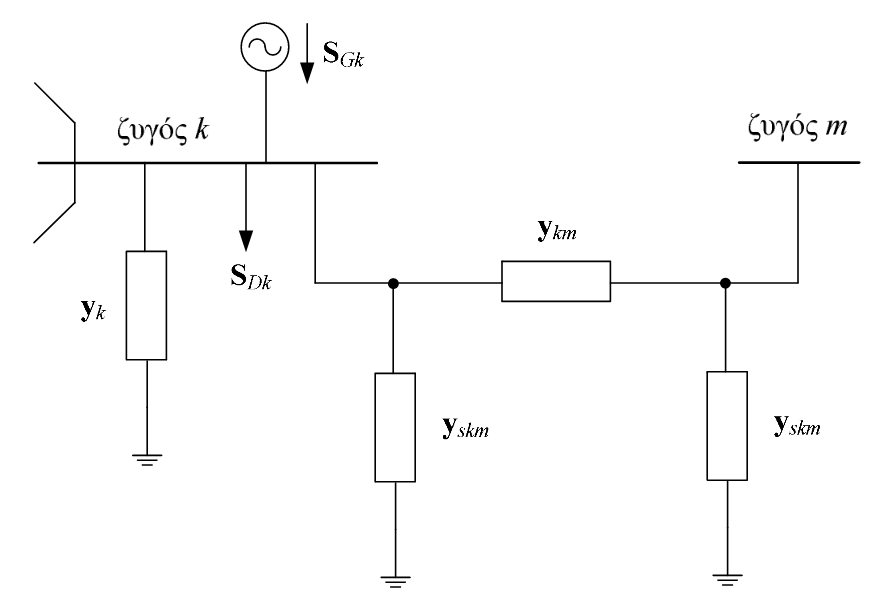

In [6]:
nl = linedata(:,1);  %line from bus 
nr = linedata(:,2);  %line to bus
R = linedata(:,3);   %line resistance
X = linedata(:,4);   %line reactance
Bc = j*linedata(:,5);
a = linedata(:, 6);
nbr=length(linedata(:,1));   %number of branch
G=[];B=[];

%the impedance of line 
Z = R + j*X  %(10) 
%the admittance of line
y= ones(nbr,1)./Z %(11) 

for n = 1:nbr
    Ybus=zeros(nbus,nbus);  % initialize Ybus to zeros
    % formation of the off diagonal elements
    for k=1:nbr
       Ybus(nl(k),nr(k))=Ybus(nl(k),nr(k))-y(k); %(9)
       Ybus(nr(k),nl(k))=Ybus(nl(k),nr(k));
    end
end
% formation of the diagonal elements
for  n=1:nbus
     for k=1:nbr
         if nl(k)==n
         Ybus(n,n) = Ybus(n,n)+y(k); %(8)
         elseif nr(k)==n
         Ybus(n,n) = Ybus(n,n)+y(k); %(8)
         else, end
     end
end

Ybus

Z =
   0.0000 + 0.0500i
   0.0000 + 0.0667i
   0.0000 + 0.1000i
y =
   0.0000 -20.0000i
   0.0000 -14.9925i
   0.0000 -10.0000i
Ybus =
   0.0000 -34.9925i   0.0000 +20.0000i   0.0000 +14.9925i
   0.0000 +20.0000i   0.0000 -30.0000i   0.0000 +10.0000i
   0.0000 +14.9925i   0.0000 +10.0000i   0.0000 -24.9925i


Ο πίνακας αγωγιμοτήτων σε καρτεσιανή μορφή γράφεται:
$$Y_{km}=G_{km} +jB_{km} \quad (12)$$

In [7]:
G = real(Ybus)                % Conductance matrix..
B = imag(Ybus)                % Susceptance matrix..

G =
     0     0     0
     0     0     0
     0     0     0
B =
  -34.9925   20.0000   14.9925
   20.0000  -30.0000   10.0000
   14.9925   10.0000  -24.9925


### Bήμα 3ο: Tο πρόβλημα ροών φορτίου
>Το πρόβλημα των ροών φορτίου (ή ισχύος) συνίσταται στον προσδιορισμό των μεταβλητών του συστήματος: 
 * των τάσεων κατά μετρο και γωνία σε όλους τους ζυγούς
 * των ροών ενεργού και αέργου ισχύος σε όλες τις γραμμές
 * των απωλειών, κ.α.
> 
><br>σε μια δεδομένη μόνιμη κατάσταση λειτουργίας η οποία αντιστοιχεί σε μια ορισμένη εικόνα καταναλώσεων των φορτίων, παραγόμενης ενεργού ισχύος και τάσεων των γεννητριών.
>### 1. Χαρακτηρισμός ζυγών του συστήματος
>####  Τύποι ζυγών ροής φορτίου
|   Τύπος ζυγού       |  Γνωστές μεταβλητές  | Άγνωστες μεταβλητές|
|---------------------|----------------------|--------------------|
|Ταλάντωσης ή αναφοράς|$V=1$α.μ.,$δ=0^\circ$ |$P_{G}$,$Q_{G}$     |
|Ζυγoί παραγωγής (PV) |    $P_{G}$,${V}$     |  $Q_{G}$,$δ$       |
|  Ζυγοί φορτίου (PQ) |   $P_{D}$,$Q_{D}$    |$V$, $δ$            |

Στο παράδειγμα είναι:

* **Ζυγός 1**: Ζυγός ταλάντωσης (sluck bus). Θεωρούμε ότι η τάση του είναι σταθερή κατά μέτρο και γωνία $V_{1}=1\angle 0^\circ $ α.μ..
* **Ζυγός 2**: Ζυγός παραγωγής (PV), αφού είναι γνωστά η παραγόμενη ενεργός ισχύς $P_{G2}=200$MW και το μέτρο της τάσης $V_{2}=1$ α.μ.
* **Ζυγός 3**: Ζυγός φορτίου (PQ), αφού είναι γνωστές οι ισχείς φορτίου $P_{D3}=300$MW,$Q_{D3}=100$ MVAr

<br>Στον πίνακα των δεδομένων των ζυγών ο ζυγός ταλάντωσης συμβολίζεται με 1, οι ζυγοί PV με 2 και οι ζυγοί PQ με 0.
<br>Στο παρακάτω τμήμα κώδικα η μεταβλητή $nPV$ εμφανίζει το πλήθος των ζυγών PV του προβλήματος, ενώ η μεταβλητή $nPQ$ εμφανίζει το πλήθος των ζυγών PQ. Οι συναρτήσεις pv και pq βρίσκουν τους ζυγούς PV και PQ αντίστοιχα.

In [8]:
nPV = 0;
nPQ = 0;

for k = 1:nbus                       
   if kb(k)==2          % PV bus
        nPV = nPV+1;end
   if kb(k)==0
        nPQ = nPQ+1;end % PQ bus
end
nPV
nPQ

pv = find(kb == 2 | kb == 1);   % PV Buses..
pq = find(kb == 0);             % PQ Buses..

nPV =
     1
nPQ =
     1


> ### 2. Δεδομένα και ζητούμενα
>#### Το διάνυσμα κατάστασης
Θεωρούμε ότι $n$ είναι ο συνολικός αριθμός των ζυγών του συστήματος και $m$ ο αριθμός των ζυγών φορτίου PQ. Γενικά για $n$ ζυγούς έχουμε $2n$ αγνώστους. Δεδομένου ότι η τάση στο ζυγό ταλάντωσης είναι δεδομένη κατά μέτρο και γωνία, ενώ τα μέτρα των τάσεων είναι γνωστά στους ζυγούς παραγωγής, οι μεταβλητές που πρέπει να προσδιοριστούν για να περιγραφεί πλήρως η κατάσταση λειτουργίας του συστήματος είναι οι ακόλουθες:
* οι φασικές γωνίες τάσεων όλων των ζυγών εκτός από το ζυγό ταλάντωσης 
* τα μέτρα τάσεων όλων των ζυγών φορτίου.

>Οι μεταβλητές αυτές αποτελούν το διάνυσμα κατάστασης $Χ = \begin{bmatrix} δ_2\\...\\δ_n\\V_{n-m+1}\\ ... \\ V_{n} \end{bmatrix} $ με διάσταση $n-1+m$. Άρα για την εύρεση των αγνώστων χρειάζονται $n-1+m$ ανεξάρτητες εξισώσεις.
* $n-1$ εξισώσεις πραγματικής ισχύος (για ζυγούς PV και PQ):
$$\boxed{ΔP_k^{(n)}=P_{sp,k}- V_{k}^{(n)}\cdot \sum_{m\in A(k)}{ V_{m}^{(n)}\cdot[G_{km}\cdot cos(δ_{k}^{(n)} - δ_{m}^{(n)}) + B_{km}\cdot sin( δ_{k}^{(n)} - δ_{m}^{(n)})]}}\quad (13)$$
* $m$ εξισώσεις αέργου ισχύος (για ζυγούς PQ):
$$\boxed{ΔQ_k^{(n)}=Q_{sp,k} - V_{k}^{(n)}\cdot \sum_{m\in A(k)}{ V_{m}^{(n)}\cdot[G_{km}\cdot sin(δ_{k}^{(n)} - δ_{m}^{(n)}) - B_{km}\cdot cos( δ_{k}^{(n)} - δ_{m}^{(n)})]}}\quad (14)$$


Στο παράδειγμα αυτό γνωρίζουμε την τάση του ζυγού 1 κατά μέτρο και γωνία $V_{1}=1\angle 0^\circ $ α.μ. καθώς και το μέτρο της τάσης του ζυγού 2, $V_{2}=1$ α.μ. Επομένως οι άγνωστοι του προβλήματος είναι 3, οι γωνίες $δ_2$, $δ_3$ και η τάση $V_3$.
To διάνυσμα κατάστασης λοιπόν έχει τη μορφή  $Χ = \begin{bmatrix} δ_2\\δ_3\\V_{3}\end{bmatrix} $ και για να υπολογιστεί θα χρειαστούν δύο εξισώσεις πραγματικής ($ΔP_{2}$, $ΔP_{3}$) και μία εξίσωση αέργου ισχύος ($ΔQ_{3}$).
<br>
<br>Δηλαδή:
<br>$\bullet$ **Ζυγοί PV, PQ:**
<br>$ΔP_2=P_{sp,2}- V_{2}\cdot V_{1}\cdot[G_{21}\cdot cos(δ_{2} - δ_{1}) + B_{21}\cdot sin( δ_{2} - δ_{1})]- V_{2}\cdot V_{3}\cdot[G_{23}\cdot cos(δ_{2} - δ_{3}) + B_{23}\cdot sin( δ_{2} - δ_{3})]$
<br>$ΔP_3=P_{sp,3}- V_{3}\cdot V_{1}\cdot[G_{31}\cdot cos(δ_{3} - δ_{1}) + B_{31}\cdot sin( δ_{3} - δ_{1})]- V_{3}\cdot V_{2}\cdot[G_{32}\cdot cos(δ_{3} - δ_{2}) + B_{32}\cdot sin( δ_{3} - δ_{2})]$
<br>$\bullet$ **Ζυγοί PQ:**
<br>$ΔQ_3=Q_{sp,3} - V_{3}\cdot V_{1}\cdot[G_{31}\cdot sin(δ_{3} - δ_{1}) - B_{31}\cdot cos( δ_{3} - δ_{1})]- V_{3}\cdot V_{2}\cdot[G_{32}\cdot sin(δ_{3} - δ_{2}) - B_{32}\cdot cos( δ_{3} - δ_{2})]$
>#### Επαναληπτική διαδικασία
* Πριν ξεκινήσουν οι επαναλήψεις της μεθόδου Newton-Raphson θεωρείται μια ενιαία τιμή εκκίνησης για τις τάσεις όλων των ζυγών του δικτύου, που δεν έχουν καθορισμένη τιμή, στα $V=1\angle 0^\circ $ α.μ.
* Χρησιμοποιώντας αυτή την αρχική εκτίμηση υπολογίζεται, με τη βοήθεια των εξισώσεων ροής φορτίου μια βελτιωμένη δεύτερη εκτίμηση η οποία χρησιμοποιείται για να βρεθεί μία τρίτη κ.ο.κ.   
* Οι επαναλήψεις συνεχίζονται μέχρι οι νέες τιμές των μεταβλητών του συστήματος να διαφέρουν από τις αρχικές πολύ λίγο, δηλαδή όταν ικανοποιούνται τα κριτήρια σύγκλισης. $$\boxed{|ΔP_{k}^{(n)}|\leq ε\\ |ΔQ_{k}^{(n)}|\leq ε}\quad (15) $$ 

<br> Στο πρόγραμμα αυτό το κριτήριο είναι: $$|M^{(n)}|\leq ε \quad (16)$$ 
όπου $M$ το διάνυσμα διαφορών: $$Μ  = \begin{bmatrix} ΔP\\ ΔQ \end{bmatrix}\quad (17)$$ και $$ε= 0.001$$
<br> Θα δούμε αναλυτικά την 1η επανάληψη: 
<br> Στο πρόγραμμα αυτό η επαναληπτική διαδικασία εκφράζεται μέσω ενός while loop, το οποίο στην εισοδό του ελέγχει το κριτήριο σύγκλισης των σχέσεων $(15)$. Στο παρακάτω κομμάτι κώδικα υπολογίζονται οι επαναληπτικές εξισώσεις ροής φορτίου σε όλους τους ζυγούς του ΣΗΕ. Από αυτές χρειαζόμαστε τις δύο εξισώσεις πραγματικής ισχύος ($ΔP_{2}$, $ΔP_{3}$), που αποθηκεύονται στο διάνυσμα dP και τη μία εξίσωση αέργου ισχύος ($ΔQ_{3}$), που αποθηκεύεται στο διάνυσμα dQ. Τα διανύσματα αυτά ενώνονται για να δημιουργηθεί το διάνυσμα διαφορών $Μ$ που έχει ίδιες διαστάσεις με το $Χ$.

In [9]:
Tol = 1;
Iter = 0;
%while (Tol >=0.001)   % Iteration starting.. (16)
Iter = Iter +1;
P = zeros(nbus,1);Q = zeros(nbus,1); % Calculate P and Q

for k = 1:nbus
    for m = 1:nbus
            P(k) = P(k) + Vm(k)*Vm(m)*(G(k,m)*cos(delta(k)-delta(m)) + B(k,m)*sin(delta(k)-delta(m))); % (13)
            Q(k) = Q(k) + Vm(k)*Vm(m)*(G(k,m)*sin(delta(k)-delta(m)) - B(k,m)*cos(delta(k)-delta(m))); % (14)    
    end
end

dPa = Psp-P; %(13)
dQa = Qsp-Q; %(14)

k = 1;
dQ = zeros(nPQ,1);
for i = 1:nbus
    if kb(i) == 0
        dQ(k,1) = dQa(i);
        k = k+1;
    end
end   

dP = dPa(2:nbus)
dQ

% Mismatch Vector
M = [dP; dQ]   % (17)    

dP =
    1.5000
   -3.0000
dQ =
    -1
M =
    1.5000
   -3.0000
   -1.0000


>### 3. Υπολογισμός Ιακωβιανής μήτρας
H Ιακωβιανή μήτρα έχει τη μορφή $$Jac = \begin{bmatrix} H & N\\ J & L \end{bmatrix}\quad (18)$$ 
* O υποπίνακας $Η$ έχει διαστάσεις $(n-1)x(n-1)$
* Ο υποπίνακας $Ν$ έχει διαστάσεις $(n-1)xm$
* Ο υποπίνακας $J$ έχει διαστάσεις $mx(n-1)$
* O υποπίνακας $L$ έχει διαστάσεις $mxm$

Στο παράδειγμα αυτό η Ιακωβιανή μήτρα έχει τη μορφή $$Jac = \begin{bmatrix} H_{22} & Η_{23} & N_{23}\\ H_{32} & H_{33} & N_{33}\\ J_{32} & J_{33} & L_{33} \end{bmatrix}$$ 

In [10]:
clear H N J L                                    
H = zeros(nbus-1,nbus-1);
N = zeros(nbus-1,nPQ);
J = zeros(nPQ,nbus-1);
L = zeros(nPQ,nPQ);

>$$\boxed{H_{kk} =\frac{\partial ΔP_k}{\partial δ_k} = V_{k}^2\cdot Β_{kk}+Q_{k}\quad (19)\\
όπου\quad Q_{k}=  V_k\cdot \sum_{k \not= m }{ V_m\cdot [G_{km}\cdot sin(δ_{k} - δ_{m}) - B_{km}\cdot cos(δ_{k} - δ_{m})]} \quad (20)\\
H_{km}=\frac{\partial ΔP_k}{\partial δ_m} = - V_k\cdot V_m\cdot [G_{km}\cdot sin(δ_{k} - δ_{m}) - B_{km}\cdot cos(δ_{k} - δ_{m})],   k \not= m\quad (21)}$$

Θα είναι:
<br>$H_{22}=  V_{2}^2\cdot Β_{22}+V_2\cdot V_1\cdot [G_{21}\cdot sin(δ_{2} - δ_{1}) - B_{21}\cdot cos(δ_{2} - δ_{1})] + V_2\cdot V_3\cdot [G_{23}\cdot sin(δ_{2} - δ_{3}) - B_{23}\cdot cos(δ_{2} - δ_{3})]$
<br>$H_{23}= - V_2\cdot V_3\cdot [G_{23}\cdot sin(δ_{2} - δ_{3}) - B_{23}\cdot cos(δ_{2} - δ_{3})]$
<br>$H_{32}= - V_3\cdot V_2\cdot [G_{32}\cdot sin(δ_{3} - δ_{2}) - B_{32}\cdot cos(δ_{3} - δ_{2})]$
<br>$H_{33}=  V_{3}^2\cdot Β_{33}+V_3\cdot V_1\cdot [G_{31}\cdot sin(δ_{3} - δ_{1}) - B_{31}\cdot cos(δ_{3} - δ_{1})] + V_3\cdot V_2\cdot [G_{32}\cdot sin(δ_{3} - δ_{2}) - B_{32}\cdot cos(δ_{3} - δ_{2})]$

In [11]:
for i = 1:(nbus-1)
    k = i+1;
    for j = 1:(nbus-1)
        m = j+1;
        if k == m
            for m = 1:nbus
                H(i,j) = H(i,j) + Vm(k)*Vm(m)*(G(k,m)*sin(delta(k)-delta(m)) - B(k,m)*cos(delta(k)-delta(m))); % (20)
            end
            H(i,j) =(Vm(k)^2)*B(k,k)+ H(i,j); % (19) 
        else
            H(i,j) = -Vm(k)*Vm(m)*(G(k,m)*sin(delta(k)-delta(m)) - B(k,m)*cos(delta(k)-delta(m))); %(21)
        end
    end
end

H

H =
  -30.0000   10.0000
   10.0000  -24.9925


>$$\boxed{N_{kk} = \frac{\partial ΔP_k}{\partial V_k}= - V_k \cdot G_{kk}-\frac{P_{k}}{V_{k}}\quad (22)\\
όπου\quad \frac{P_{k}}{V_{k}} = \sum_{k \not= m }{ V_m\cdot [G_{km}\cdot cos(δ_{k} - δ_{m}) + B_{km}\cdot sin(δ_{k} - δ_{m})]}\quad (23)\\
N_{km}=\frac{\partial ΔP_k}{\partial V_m} = - V_k\cdot [G_{km}\cdot cos(δ_{k} - δ_{m}) + B_{km}\cdot sin(δ_{k} - δ_{m})], k \not= m\quad (24)}$$

<br>$N_{23} =- V_2\cdot [G_{23}\cdot cos(δ_{2} - δ_{3}) + B_{23}\cdot sin(δ_{2} - δ_{3})]$
<br>$N_{33} =- V_3 \cdot G_{33} - V_1\cdot [G_{31}\cdot cos(δ_{3} - δ_{1}) + B_{31}\cdot sin(δ_{3} - δ_{1})] -V_2\cdot [G_{32}\cdot cos(δ_{3} - δ_{2}) + B_{32}\cdot sin(δ_{3} - δ_{2})]$

In [12]:
for i = 1:(nbus-1)
        k = i+1;
        for j = 1:nPQ
            m = pq(j);
            if k == m
                for m = 1:nbus
                    N(i,j) = N(i,j) + Vm(m)*(G(k,m)*cos(delta(k)-delta(m)) + B(k,m)*sin(delta(k)-delta(m))); % (23)                 
                end
                N(i,j) =- Vm(k)*G(k,k)- N(i,j); % (22)
            else
                N(i,j) = -Vm(k)*(G(k,m)*cos(delta(k)-delta(m)) + B(k,m)*sin(delta(k)-delta(m))); % (24)
            end
        end
    end
N    

N =
     0
     0


>$$\boxed{J_{kk}=\frac{\partial ΔQ_k}{\partial δ_k} =  V_k^2\cdot G_{kk} -P_{k} \quad (25)\\
όπου\quad P_{k}=V_k\cdot \sum_{k \not= m}{ V_m\cdot [G_{km}\cdot cos(δ_{k} - δ_{m}) + B_{km}\cdot sin(δ_{k} - δ_{m})]} \quad (26)\\
J_{km}=\frac{\partial ΔQ_k}{\partial δ_m} =  V_k\cdot V_m\cdot [G_{km}\cdot cos(δ_{k} - δ_{m}) - B_{km}\cdot sin(δ_{k} - δ_{m})], k \not= m\quad (27)}$$

<br>$J_{32}=  V_3\cdot V_2\cdot [G_{32}\cdot cos(δ_{3} - δ_{2}) - B_{32}\cdot sin(δ_{3} - δ_{2})]$
<br>$J_{33}=  V_3^2\cdot G_{33}-V_3\cdot V_1\cdot [G_{31}\cdot cos(δ_{3} - δ_{1}) - B_{31}\cdot sin(δ_{3} - δ_{1})]-V_3\cdot V_2\cdot [G_{32}\cdot cos(δ_{3} - δ_{2}) - B_{32}\cdot sin(δ_{3} - δ_{2})]$

In [13]:
for i = 1:nPQ
    k = pq(i);
    for j = 1:(nbus-1)
        m = j+1;
        if k == m
            for m = 1:nbus
                J(i,j) = J(i,j) + Vm(k)*Vm(m)*(G(k,m)*cos(delta(k)-delta(m)) + B(k,m)*sin(delta(k)-delta(m))); %(26)
            end
                J(i,j) =(Vm(k)^2)*G(k,k)-J(i,j); %(25)
            else
                J(i,j) = Vm(k)* Vm(m)*(G(k,m)*cos(delta(k)-delta(m)) + B(k,m)*sin(delta(k)-delta(m))); %(27)
        end
    end
end
J

J =
     0     0


>$$\boxed{L_{kk}=\frac{\partial ΔQ_k}{\partial V_m} =  V_k\cdot B_{kk}- \frac{Q_{k}}{V_{k}}\quad (28)\\
όπου\quad \frac{Q_{k}}{V_{k}} = \sum_{k\not=m}{ V_m\cdot [G_{km}\cdot sin(δ_{k} - δ_{m}) - B_{km}\cdot cos(δ_{k} - δ_{m})]}\quad (29)\\
L_{km}=\frac{\partial ΔQ_k}{\partial V_m} = - V_k\cdot [G_{km}\cdot sin(δ_{k} - δ_{m}) - B_{km}\cdot cos(δ_{k} - δ_{m})], k \not= m \quad (30)}$$

<br>$L_{33}= V_3\cdot B_{33}-V_1\cdot [G_{31}\cdot sin(δ_{3} - δ_{1}) - B_{31}\cdot cos(δ_{3} - δ_{1})]-V_2\cdot [G_{32}\cdot sin(δ_{3} - δ_{2}) - B_{32}\cdot cos(δ_{3} - δ_{2})]$

In [14]:
for i = 1:nPQ
        k = pq(i);
        for j = 1:nPQ
            m = pq(j);
            if k == m
                for k = 1:nbus
                    L(i,j) = L(i,j) + Vm(m)*(G(k,m)*sin(delta(k)-delta(m)) - B(k,m)*cos(delta(k)-delta(m))); % (29)
                end
                L(i,j) = Vm(k)*B(k,k)-L(i,j); % (28)
            else
                L(i,j) = -Vm(k)*(G(k,m)*sin(delta(k)-delta(m)) - B(k,m)*cos(delta(k)-delta(m))); % (30)
            end
        end
 end
 L

L =
  -24.9925


Επομένως η Ιακωβιανή μήτρα για την 1η επανάληψη θα είναι:

In [15]:
 Jac = -[H   N; J   L] % Jacobian matrix

Jac =
   30.0000  -10.0000         0
  -10.0000   24.9925         0
         0         0   24.9925


>### 4. Υπολογισμός των νέων τάσεων και γωνιών του συστήματος
Από τη γενική εξίσωση Newton-Raphson υπολογίζεται το διάνυσμα των αγνώστων:
$$ Χ = J^{-1}Μ^{(n)}\quad \Rightarrow \quad \begin{bmatrix} Δδ\\ ΔV \end{bmatrix} = \begin{bmatrix} H & N\\ J & L \end{bmatrix}^{-1}\begin{bmatrix} ΔP\\ ΔQ\end{bmatrix} \quad (31)$$


In [16]:
% Correction Vector
X = inv(Jac)*M     % (31)      

dTh = X(1:nbus-1)      % Change in Voltage Angle..
dV = X(nbus:end)       % Change in Voltage Magnitude..

X =
    0.0115
   -0.1154
   -0.0400
dTh =
    0.0115
   -0.1154
dV =
   -0.0400


>Οι νέες τιμές υπολογίζονται χρησιμοποιώντας τις τιμές της προηγούμενης επανάληψης:
>$$\begin{bmatrix}δ\end{bmatrix}^{(n+1)}=\begin{bmatrix}Δδ\end{bmatrix}+\begin{bmatrix} δ\end{bmatrix}^{(n)}\quad (32)$$
$$\begin{bmatrix}V\end{bmatrix}^{(n+1)}=\begin{bmatrix}ΔV\end{bmatrix}+\begin{bmatrix} V\end{bmatrix}^{(n)}\quad (33)$$

Δηλαδή: $$\begin{bmatrix}0\\δ_2\\ δ_3\end{bmatrix}^{(1)}=\begin{bmatrix}Δδ\end{bmatrix}+ \begin{bmatrix} 0 \\0\\0 \end{bmatrix} $$
και 
$$\begin{bmatrix}1\\1\\ V_3\end{bmatrix}^{(1)}=\begin{bmatrix}ΔV\end{bmatrix}+\begin{bmatrix} 1\\1\\1 \end{bmatrix}$$

In [17]:
% Updating State Vectors..
% Voltage Angle..
delta(2:nbus) = dTh + delta(2:nbus)'    % (32)

% Voltage Magnitude..
k = 1;
for i = 2:nbus
    if kb(i) == 0
        Vm(i) = dV(k) + Vm(i);        % (33)
        k = k+1;
        end
    end
Vm

delta =
         0    0.0115   -0.1154
Vm =
    1.0000    1.0000    0.9600


>Μετατροπή γωνιών από ακτίνια σε μοίρες:
$$ δ^\circ= \frac{180^\circ}{\pi}\cdot(rad) \quad (34)$$

In [18]:
deltad=180/pi*delta % (34)

deltad =
         0    0.6603   -6.6133


>### 5. Υπολογισμός ισχύων στους ζυγούς 
Οι ισχύς που χρειάζεται να προσδιοριστούν αν πρόκειται:
* Για ζυγό ταλάντωσης, είναι η ενεργός και η άεργος ισχύς του, $P_{G}$,$Q_{G}$  
* Για ζυγο PV, η άεργος ισχύς του, $Q_{G}$
<br>Οι ισχείς αυτές δίνονται από τις σχέσεις:
$$P_G = P_k\cdot S_{base} + P_D \quad (35)$$
$$Q_G = Q_k\cdot S_{base} + Q_D\quad (36)$$
Και οι μιγαδικές ισχείς εκφράζονται ως:
>$$S_{k} = P_{k} + jQ_{k}\quad (37)$$

In [19]:
k=0;
for n = 1:nbus
     if kb(n) == 1
     k=k+1;
     S(n)= P(n)+j*Q(n); % (37)
     Pg(n) = P(n)*basemva + Pd(n); % (35)
     Qg(n) = Q(n)*basemva + Qd(n); % (36)
     elseif  kb(n) ==2
     k=k+1;
     S(n)=P(n)+j*Q(n); % (37)
     Qg(n) = Q(n)*basemva + Qd(n); % (36)
  end
yload(n) = (Pd(n)- j*Qd(n))/(basemva*Vm(n)^2);
end
Pg
Qg

Pg =
     0
   200
     0
Qg =
    0.0000
   50.0000
         0


Το αρχείο Busout υπολογίζει και εμφανίζει τα τελικά αποτελέσματα της ροής φορτίου και το αρχείο Lineflow υπολογίζει και εμφανίζει τις ροές ισχύος στις γραμμές καθώς και τις αντίστοιχες απώλειες ισχύος (όλα τα μεγέθη σε MW και MVar).

>### 6. Υπολογισμός Ροών Ισχύος Γραμμής 
><br>
><div>
>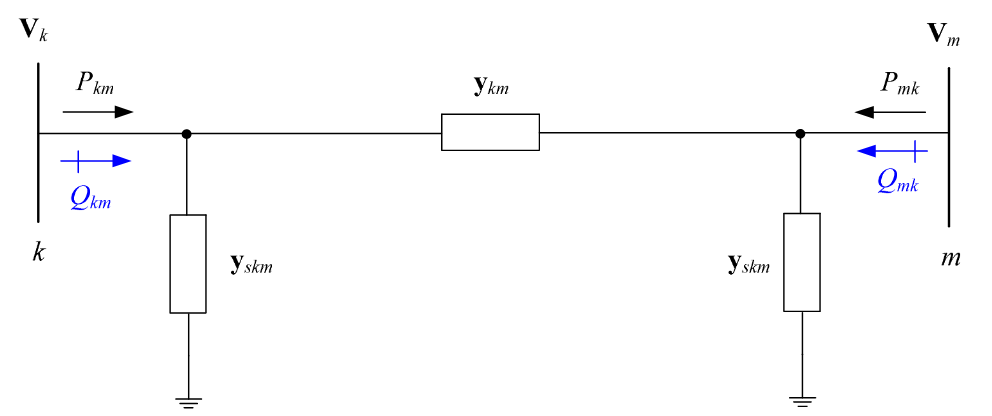
></div>
><h4><center> Σχήμα 3: Ροή ισχύος στη γραμμή $k-m$</center></h4>
>Στη γραμμή μεταφοράς $k-m$ του Σχήματος 3:
<br>
<br>
$\bullet$ H ανα μονάδα ροή ενεργού ισχύος $P_{km}$ στον ζυγό $k$, με κατεύθυνση από τον ζυγό $k$ προς τον ζυγό $m$:
<br>
<br>
$$P_{km}=(g_{km}+g_{skm})\cdot V_{k}^{2}-  V_{k}\cdot V_{m}\cdot [g_{km}\cdot cos(δ_{k} - δ_{m}) + b_{km}\cdot sin( δ_{k} - δ_{m})]\quad (38)$$
<br>
$\bullet$ H ανα μονάδα ροή ενεργού ισχύος $P_{mk}$ στον ζυγό $m$, με κατεύθυνση από τον ζυγό $m$ προς τον ζυγό $k$:
<br>
<br>
$$P_{mk}=(g_{km}+g_{skm})\cdot V_{m}^{2}-  V_{m}\cdot V_{k}\cdot [g_{km}\cdot cos(δ_{m} - δ_{k}) + b_{mk}\cdot sin( δ_{m} - δ_{k})]\quad (39)$$
<br>
$\bullet$ Οι ανά μονάδα απώλειες ενεργού ισχύος $PLoss_{km}$:
$$PLoss_{km}=P_{km}+P_{mk}\quad (40)$$
<br>
Στη γραμμή μεταφοράς $k-m$ του Σχήματος 3:
<br>
<br>
$\bullet$ H ανα μονάδα ροή αέργου ισχύος $Q_{km}$ στον ζυγό $k$, με κατεύθυνση από τον ζυγό $k$ προς τον ζυγό $m$:
<br>
<br>
$$Q_{km}=-(b_{km}+b_{skm})\cdot V_{k}^{2}-  V_{k}\cdot V_{m}\cdot [g_{km}\cdot sin(δ_{k} - δ_{m}) + b_{km}\cdot cos( δ_{k} - δ_{m})]\quad (41)$$
<br>
$\bullet$ H ανα μονάδα ροή αέργου ισχύος $Q_{mk}$ στον ζυγό $m$, με κατεύθυνση από τον ζυγό $m$ προς τον ζυγό $k$:
<br>
<br>
$$Q_{mk}=(b_{km}+b_{skm})\cdot V_{m}^{2}-  V_{m}\cdot V_{k}\cdot [g_{km}\cdot sin(δ_{m} - δ_{k}) + b_{mk}\cdot cos( δ_{m} - δ_{k})]\quad (42)$$
<br>
$\bullet$ Οι ανά μονάδα απώλειες ενεργού ισχύος $QLoss_{km}$:
$$QLoss_{km}=Q_{km}+Q_{mk}\quad (43)$$

Στο σημείο αυτό ολοκληρώνεται η 1η επανάληψη της μεθόδου. Η μεταβλητή $Τol$ παίρνει την τιμή της μέγιστης απόλυτης τιμής του διανύσματος διαφορών $Μ$ ώστε να ελεγχθεί το κριτήριο σύγκλισης στην αρχή του while loop.    

In [20]:
Busout
Lineflow
% Tolerance..
%Tol = max(abs(M)); 
%end

                   Power Flow Solution by Newton-Raphson Method
                        Maximum Power Mismatch = 1 
                             No. of Iterations = 1 

    Bus  Voltage    Angle       ------Load------        ---Generation---       Injected
    No.  Mag.       Degree        MW       Mvar           MW       Mvar           Mvar 
                                                                                       
    1    1.000       0.00        0.00      0.00          0.00      0.00           0.00
    2    1.000       0.66       50.00     50.00        200.00     50.00           0.00
    3    0.960      -6.61      300.00    100.00          0.00      0.00           0.00
      
    Total                      350.00    150.00        200.00     50.00           0.00


                           Line Flow and Losses 

     --Line--  Power at bus & line flow    --Line loss--  Transformer
     from  to    MW      Mvar     MVA       MW      Mvar      tap
   
     1          0.00

Το παρακάτω κελί περιέχει όλο τον κώδικα της ροής φορτίου με τη μέθοδο Νewton-Raphson που περιγράψαμε αναλυτικά παραπάνω, το οποίο τρέχει και εμφανίζει τα αποτελέσματα για τις τρεις πρώτες επαναλήψεις. 

In [21]:
% Newton_Raphson iterations
basemva = 100;

%             Line code
%         Bus bus   R      X      1/2 B     = 1 for lines  
%         nl  nr   p.u.   p.u.    p.u.      > 1 or < 1 tr. tap at bus nl       
linedata=[1   2    0.0    0.05     0.0         1        
          1   3    0.0    0.0667   0.0         1        
          2   3    0.0    0.1      0.0         1];
          
%        Bus Bus  Voltage Angle   ---Load---- --Generator-- Injected 
%        No  code Mag.    Degree   MW   Mvar    MW  Mvar    Mvar
busdata=[1   1    1.00    0.0      0      0      0    0      0      
         2   2    1.00    0.0     50     50     200   0      0     
         3   0    1.00    0.0     300    100     0    0      0 ];
         
Vm=0; delta=0; yload=0; deltad=0;
nbus = length(busdata(:,1));
kb=[];Vm=[]; delta=[]; V=[]; 
Pg = zeros(nbus,1); Pd = zeros(nbus,1); Qg = zeros(nbus,1); Qd = zeros(nbus,1);
Psp = zeros(nbus,1); Qsp = zeros(nbus,1); Qsh = zeros(nbus,1);
S = zeros(nbus,1);

for k=1:nbus
n=busdata(k,1); kb(n)=busdata(k,2); Vm(n)=busdata(k,3); delta(n)=busdata(k, 4);
Pd(n)=busdata(k,5); Qd(n)=busdata(k,6); Pg(n)=busdata(k,7); Qg(n) = busdata(k,8);
     delta(n) = pi/180*delta(n); 
     Psp(n)=(Pg(n)-Pd(n))/basemva; % (4)
     Qsp(n)=(Qg(n)-Qd(n))/basemva; % (5)
     S(n) = Psp(n) + j*Qsp(n); % (6)
end

nl = linedata(:,1);  %line from bus 
nr = linedata(:,2);  %line to bus
R = linedata(:,3);   %line resistance
X = linedata(:,4);   %line reactance
Bc = j*linedata(:,5);
a = linedata(:, 6);
nbr=length(linedata(:,1));   %number of branch
G=[];B=[];

%the impedance of line 
Z = R + j*X;  %(10) 
%the admittance of line
y= ones(nbr,1)./Z; %(11) 

for n = 1:nbr
    Ybus=zeros(nbus,nbus);  % initialize Ybus to zeros
    % formation of the off diagonal elements
    for k=1:nbr
       Ybus(nl(k),nr(k))=Ybus(nl(k),nr(k))-y(k); %(9)
       Ybus(nr(k),nl(k))=Ybus(nl(k),nr(k));
    end
end
% formation of the diagonal elements
for  n=1:nbus
     for k=1:nbr
         if nl(k)==n
         Ybus(n,n) = Ybus(n,n)+y(k); %(8)
         elseif nr(k)==n
         Ybus(n,n) = Ybus(n,n)+y(k); %(8)
         else, end
     end
end

G = real(Ybus);                % Conductance matrix..
B = imag(Ybus);                % Susceptance matrix..

nPV = 0;
nPQ = 0;

for k = 1:nbus                       
   if kb(k)==2          % PV bus
        nPV = nPV+1;end
   if kb(k)==0
        nPQ = nPQ+1;end % PQ bus
end

pv = find(kb == 2 | kb == 1);   % PV Buses..
pq = find(kb == 0);             % PQ Buses..

Tol = 1;
Iter = 0;
while (Tol >=0.001 && Iter<3)   % Iteration starting.. (16)
Iter = Iter +1;
P = zeros(nbus,1);Q = zeros(nbus,1); % Calculate P and Q

for k = 1:nbus
    for m = 1:nbus
            P(k) = P(k) + Vm(k)*Vm(m)*(G(k,m)*cos(delta(k)-delta(m)) + B(k,m)*sin(delta(k)-delta(m))); % (13)
            Q(k) = Q(k) + Vm(k)*Vm(m)*(G(k,m)*sin(delta(k)-delta(m)) - B(k,m)*cos(delta(k)-delta(m))); % (14)    
    end
end

dPa = Psp-P; %(13)
dQa = Qsp-Q; %(14)

k = 1;
dQ = zeros(nPQ,1);
for i = 1:nbus
    if kb(i) == 0
        dQ(k,1) = dQa(i);
        k = k+1;
    end
end   

dP = dPa(2:nbus);
dQ;

% Mismatch Vector
M = [dP; dQ];   % (17)    

clear H N J L                                    
H = zeros(nbus-1,nbus-1);
N = zeros(nbus-1,nPQ);
J = zeros(nPQ,nbus-1);
L = zeros(nPQ,nPQ);

for i = 1:(nbus-1)
    k = i+1;
    for j = 1:(nbus-1)
        m = j+1;
        if k == m
            for m = 1:nbus
                H(i,j) = H(i,j) + Vm(k)*Vm(m)*(G(k,m)*sin(delta(k)-delta(m)) - B(k,m)*cos(delta(k)-delta(m))); % (20)
            end
            H(i,j) =(Vm(k)^2)*B(k,k)+ H(i,j); % (19) 
        else
            H(i,j) = -Vm(k)*Vm(m)*(G(k,m)*sin(delta(k)-delta(m)) - B(k,m)*cos(delta(k)-delta(m))); %(21)
        end
    end
end

for i = 1:(nbus-1)
        k = i+1;
        for j = 1:nPQ
            m = pq(j);
            if k == m
                for m = 1:nbus
                    N(i,j) = N(i,j) + Vm(m)*(G(k,m)*cos(delta(k)-delta(m)) + B(k,m)*sin(delta(k)-delta(m))); % (23)                 
                end
                N(i,j) =- Vm(k)*G(k,k)- N(i,j); % (22)
            else
                N(i,j) = -Vm(k)*(G(k,m)*cos(delta(k)-delta(m)) + B(k,m)*sin(delta(k)-delta(m))); % (24)
            end
        end
    end
    
    for i = 1:nPQ
    k = pq(i);
    for j = 1:(nbus-1)
        m = j+1;
        if k == m
            for m = 1:nbus
                J(i,j) = J(i,j) + Vm(k)*Vm(m)*(G(k,m)*cos(delta(k)-delta(m)) + B(k,m)*sin(delta(k)-delta(m))); %(26)
            end
                J(i,j) =(Vm(k)^2)*G(k,k)-J(i,j); %(25)
            else
                J(i,j) = Vm(k)* Vm(m)*(G(k,m)*cos(delta(k)-delta(m)) + B(k,m)*sin(delta(k)-delta(m))); %(27)
        end
    end
end

for i = 1:nPQ
        k = pq(i);
        for j = 1:nPQ
            m = pq(j);
            if k == m
                for k = 1:nbus
                    L(i,j) = L(i,j) + Vm(m)*(G(k,m)*sin(delta(k)-delta(m)) - B(k,m)*cos(delta(k)-delta(m))); % (29)
                end
                L(i,j) = Vm(k)*B(k,k)-L(i,j); % (28)
            else
                L(i,j) = -Vm(k)*(G(k,m)*sin(delta(k)-delta(m)) - B(k,m)*cos(delta(k)-delta(m))); % (30)
            end
        end
 end
 
  Jac = -[H   N; J   L]; % Jacobian matrix
  
  % Correction Vector
X = inv(Jac)*M;     % (31)      

dTh = X(1:nbus-1);     % Change in Voltage Angle..
dV = X(nbus:end);       % Change in Voltage Magnitude..

% Updating State Vectors..
% Voltage Angle..
delta(2:nbus) = dTh + delta(2:nbus)';    % (32)

% Voltage Magnitude..
k = 1;
for i = 2:nbus
    if kb(i) == 0
        Vm(i) = dV(k) + Vm(i);        % (33)
        k = k+1;
        end
    end
    
deltad=180/pi*delta; % (34)

k=0;
for n = 1:nbus
     if kb(n) == 1
     k=k+1;
     S(n)= P(n)+j*Q(n);
     Pg(n) = P(n)*basemva + Pd(n);
     Qg(n) = Q(n)*basemva + Qd(n);
     elseif  kb(n) ==2
     k=k+1;
     S(n)=P(n)+j*Q(n);
     Qg(n) = Q(n)*basemva + Qd(n);
  end
yload(n) = (Pd(n)- j*Qd(n))/(basemva*Vm(n)^2);
end

Busout
Lineflow

% Tolerance..
Tol = max(abs(M)); 
end

                   Power Flow Solution by Newton-Raphson Method
                        Maximum Power Mismatch = 1 
                             No. of Iterations = 1 

    Bus  Voltage    Angle       ------Load------        ---Generation---       Injected
    No.  Mag.       Degree        MW       Mvar           MW       Mvar           Mvar 
                                                                                       
    1    1.000       0.00        0.00      0.00          0.00      0.00           0.00
    2    1.000       0.66       50.00     50.00        200.00     50.00           0.00
    3    0.960      -6.61      300.00    100.00          0.00      0.00           0.00
      
    Total                      350.00    150.00        200.00     50.00           0.00


                           Line Flow and Losses 

     --Line--  Power at bus & line flow    --Line loss--  Transformer
     from  to    MW      Mvar     MVA       MW      Mvar      tap
   
     1          0.00

### Βιβλιογραφία
>* Παπαδιά, Β. Ανάλυση Συστήματος Ηλεκτρικής Ενέργειας: Μόνιμη Κατάσταση Λειτουργίας ( Τόμος 1), Αθήνα 1985, Εκδόσεις ΕΜΠ
* Βουρνά, Κ., Κονταξή, Γ. Εισαγωγή στα Συστήματα Ηλεκτρικής Ενέργειας, Αθήνα 2001
* Γεωργιλάκης, Π. Σύγχρονα Συστήματα Μεταφοράς και ∆ιανομής Ηλεκτρικής Ενέργειας. Ηλεκτρονικό Βιβλίο, Σύνδεσμος Ελληνικών Ακαδημαϊκών Βιβλιοθηκών (ΣΕΑΒ), Αθήνα, 2015. ISBN: 978-960-603-038-3